Looking at the necessary steps required before any
 machine learning takes place. It involves:

* loading the data;
* looking at the variables in the dataset, in particular, differentiate
  between numerical and categorical variables, which need different
  preprocessing in most machine learning workflows;
* visualizing the distribution of the variables to gain some insights into
  the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
train_df = pd.read_csv('./adult.data', 
                       names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                              'marital-status','occupation', 'relationship', 
                              'race', 'sex', 'capital-gain','capital-loss', 
                              'hours-per-week', 'native-country', 'class']
                       )

test_df = pd.read_csv('./adult.test', 
                       names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                              'marital-status','occupation', 'relationship', 
                              'race', 'sex', 'capital-gain','capital-loss', 
                              'hours-per-week', 'native-country', 'class'],
                      skiprows=1
)


In [ ]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
df = pd.concat([train_df, test_df], axis=0)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.to_csv('adult_cencus.csv', index=False)

In [12]:
adult_df = pd.read_csv('adult_cencus.csv', na_values=' ?')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(48842, 15)

In [13]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
adult_df.columns = adult_df.columns.str.replace('-', '_')

In [6]:
adult_df['class'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: class, dtype: int64

In [15]:
adult_df['class'] = adult_df['class'].str.replace('.', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [16]:
adult_df['class'].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [18]:
adult_df['occupation'].value_counts(dropna=False)

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
NaN                   2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [20]:
adult_df.sample(50)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
33794,43,Local-gov,70055,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,56,United-States,<=50K
29914,33,Private,547886,Bachelors,13,Separated,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K
11372,29,Private,205499,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,<=50K
3887,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States,>50K
5297,49,Private,268234,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
20542,30,Private,228406,HS-grad,9,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
44909,29,Private,39388,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
24951,19,Private,277695,9th,5,Never-married,Farming-fishing,Other-relative,White,Male,0,0,16,Mexico,<=50K
23254,25,Private,216724,HS-grad,9,Divorced,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
12393,41,Private,57233,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,<=50K


In [11]:
adult_df.loc[47241, 'workclass']

' ?'

In [21]:
adult_df.to_csv('adult_df.csv', index=False)

In [25]:
df = pd.read_csv('adult_cencus.csv')

In [26]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
35299,38,Local-gov,326701,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,United-States,>50K
31141,53,Private,191565,1st-4th,2,Divorced,Other-service,Unmarried,Black,Female,0,0,40,Dominican-Republic,<=50K
45311,22,Private,125010,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,20,United-States,<=50K
33463,31,Private,386299,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
39735,30,Private,213722,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,>50K


In [29]:
df['class'].value_counts(dropna=False, normalize=True)

 <=50K    0.760718
 >50K     0.239282
Name: class, dtype: float64

In [31]:
data, target = df.drop(columns=['class']), df['class']

In [32]:
from sklearn.compose import make_column_selector as selector

numerical =selector(dtype_include=np.number)(data)
categorical = selector(dtype_include=object)(data)

all_features = numerical + categorical + ['class']

In [33]:
all_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'class']

## Visual inspection of the data
Before building a predictive model, it is a good idea to look at the data:

* maybe the task you are trying to achieve can be solved without machine
  learning;
* you need to check that the information you need for your task is actually present in the dataset;
* inspecting the data is a good way to find peculiarities. These can arise
  during data collection (for example, malfunctioning sensor or missing
  values), or from the way the data is processed afterwards (for example
  capped values).

Let's look at the distribution of individual features, to get some insights about the data. We can start by plotting histograms,

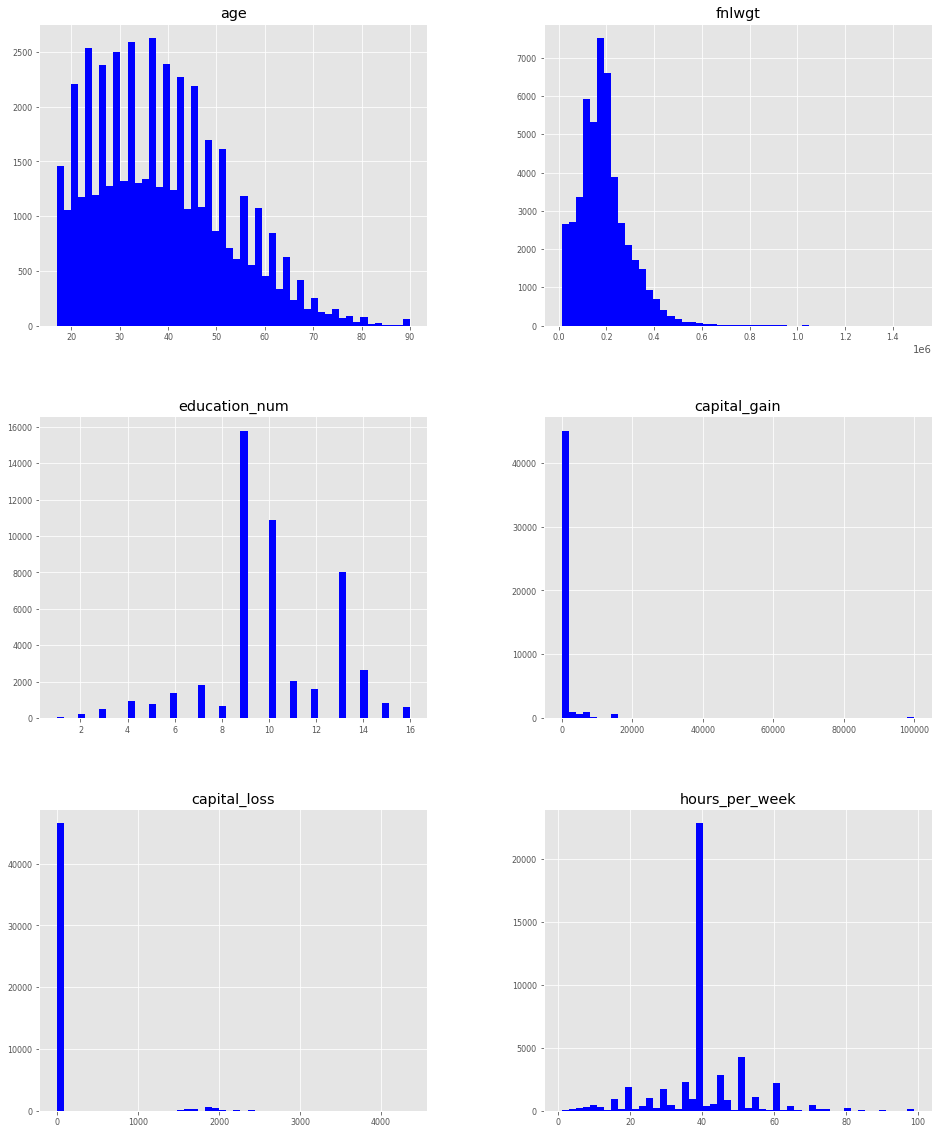

In [35]:
df[numerical].hist(figsize=(16, 20), color = 'b', bins=50, xlabelsize=8, ylabelsize=8);

We can already make a few comments about some of the variables:

* `"age"`: there are not that many points for `age > 70`. The dataset
  description does indicate that retired people have been filtered out
  (`hours-per-week > 0`);
* `"education-num"`: peak at 9, 10 and 13, hard to tell what it corresponds to without looking much further. ;
* `"hours-per-week"` peaks at 40, this was very likely the standard number of
  working hours at the time of the data collection;
* most values of `"capital-gain"` and `"capital-loss"` are close to zero.

For categorical variables, we can look at the distribution of values:

In [36]:
for col in df[categorical].columns:
  print(col)
  print(df[col].value_counts(dropna=False, normalize=True) * 100.)
  print()
  print()


workclass
 Private             69.419762
 Self-emp-not-inc     7.907129
 Local-gov            6.420703
NaN                   5.730724
 State-gov            4.055935
 Self-emp-inc         3.470374
 Federal-gov          2.931903
 Without-pay          0.042996
 Never-worked         0.020474
Name: workclass, dtype: float64


education
 HS-grad         32.316449
 Some-college    22.271815
 Bachelors       16.430531
 Masters          5.439990
 Assoc-voc        4.219729
 11th             3.709922
 Assoc-acdm       3.277917
 10th             2.843864
 7th-8th          1.955284
 Prof-school      1.707547
 9th              1.547848
 12th             1.345154
 Doctorate        1.216166
 5th-6th          1.042136
 1st-4th          0.505712
 Preschool        0.169936
Name: education, dtype: float64


marital_status
 Married-civ-spouse       45.819172
 Never-married            32.998239
 Divorced                 13.580525
 Separated                 3.132550
 Widowed                   3.107981
 Marri